In [2]:

from pandas import read_csv
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Thub_netlist.csv')


/tmp/ipython-input-646839545.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Thub_netlist.csv')


In [4]:
df=df.dropna(axis=1,how="any")

In [5]:
df=df.drop(columns=['50'])

In [6]:
#df.head()

In [7]:
df = df.dropna()
df = df.replace("'Trojan Infected'",1)
df = df.replace("'Trojan Free'",0)

In [8]:
#df

In [9]:

from pandas import read_csv
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import numpy as np

In [10]:
arr=np.array(df.values)

In [11]:
X=arr[1:,0:48]
X=X.astype('float')
Y=(arr[1:,47]).astype('float')

In [12]:
X.shape

(907, 48)

In [13]:
#Y

In [14]:
Y.shape

(907,)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
#X

In [17]:
#print(X)

In [18]:
#print(Y)

In [19]:
X.shape

(907, 48)

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,Y)

In [21]:
y_sm

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
from sklearn.decomposition import PCA

In [61]:
# feature extraction
pca = PCA(n_components=11)
X_pca= pca.fit_transform(X)

In [62]:
#Y

In [63]:
len(X) == len(Y)

True

In [64]:
X_pca

array([[ 2.88180758e+01, -6.09159200e-01,  1.02654172e+00, ...,
        -5.85894213e-01, -2.30795929e-01, -1.22180781e-01],
       [ 2.89389297e+01, -1.24912521e-01,  2.58495976e-03, ...,
        -3.92697418e-01, -2.26739396e-01,  5.02686662e-02],
       [ 2.89585938e+01, -1.25444733e-01,  4.10999384e-03, ...,
        -3.94047272e-01, -1.87247345e-01,  8.42210377e-02],
       ...,
       [-7.29842868e-01, -1.26742554e+00,  3.92519183e+00, ...,
        -2.56093667e-02, -2.12613465e-02, -4.20339289e-03],
       [-7.27042801e-01, -1.25654390e+00,  3.90611135e+00, ...,
        -2.76926688e-02, -2.13296147e-02, -4.19089765e-03],
       [-7.21695329e-01, -1.23332283e+00,  3.86300571e+00, ...,
        -3.18117523e-02, -2.13840127e-02, -4.19089598e-03]])

In [65]:
X_pca.shape

(907, 11)

In [66]:
X_pca.shape

(907, 11)

In [67]:
X.shape

(907, 48)

In [68]:
Y.shape

(907,)

In [69]:
 y_sm.shape

(1772,)

In [72]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, Y_train, Y_test= train_test_split(X_pca,  Y, test_size= 0.2, random_state=0)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [74]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


0.9945054945054945
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.99      1.00      1.00       177

    accuracy                           0.99       182
   macro avg       1.00      0.90      0.94       182
weighted avg       0.99      0.99      0.99       182



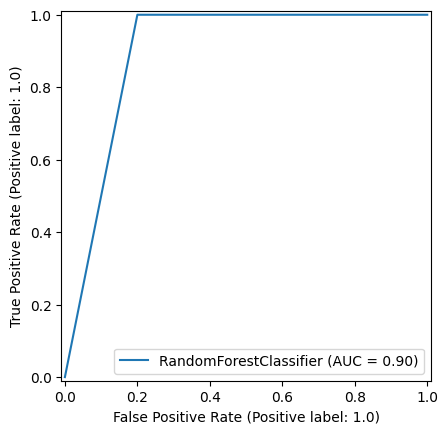

In [75]:

clf = RandomForestClassifier(n_estimators =2)

clf.fit(X_train_pca, Y_train)


Y_pred = clf.predict(X_test_pca)
print(accuracy_score(Y_test,Y_pred))

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()


In [76]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  4   1]
 [  0 177]]


In [97]:
import time
import sys

# Measure prediction latency
start_time = time.time()
Y_pred_latency = clf.predict(X_test_pca)
end_time = time.time()
latency = (end_time - start_time) # Latency in seconds
print(f"Prediction Latency: {latency:.4f} seconds")

# Measure memory footprint
# This will give an estimate of the model's size in memory
memory_footprint_bytes = sys.getsizeof(clf)
memory_footprint_kb = memory_footprint_bytes / 1024
print(f"Memory Footprint: {memory_footprint_kb:.2f} KB")

Prediction Latency: 0.0024 seconds
Memory Footprint: 0.05 KB


LOGISTIC REGRESSION

In [78]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00       177

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182

100.0


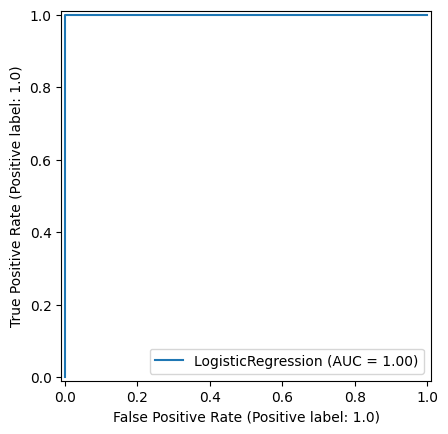

In [79]:

clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=300,multi_class='ovr')

clf.fit(X_train_pca, Y_train)


Y_pred = clf.predict(X_test_pca)


accuracy = 100 * accuracy_score(Y_test, Y_pred)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))


print(accuracy)

metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()


In [80]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

In [81]:
tn, fp, fn, tp

(np.int64(5), np.int64(0), np.int64(0), np.int64(177))

In [82]:
tp, tn, fp, fn

(np.int64(177), np.int64(5), np.int64(0), np.int64(0))

KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier


100.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00       177

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



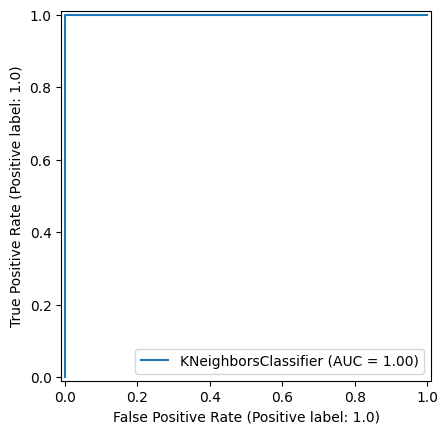

In [84]:


clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(X_train_pca, Y_train)

Y_pred = clf.predict(X_test_pca)

accuracy = 100 * accuracy_score(Y_test, Y_pred)

print(accuracy)


from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()

XGBOOST

In [85]:
from xgboost import XGBClassifier


99.45054945054946
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.99      1.00      1.00       177

    accuracy                           0.99       182
   macro avg       1.00      0.90      0.94       182
weighted avg       0.99      0.99      0.99       182



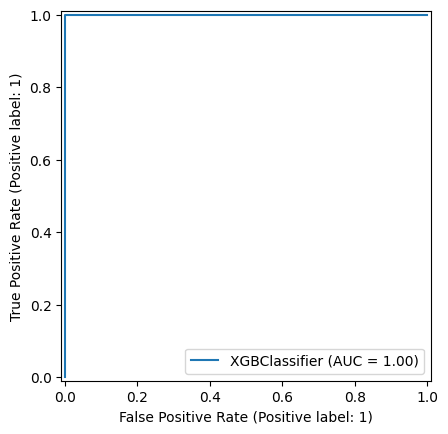

In [86]:


clf = XGBClassifier(n_estimators=20)

clf.fit(X_train_pca, Y_train)

Y_pred = clf.predict(X_test_pca)

accuracy = 100 * accuracy_score(Y_test, Y_pred)

print(accuracy)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()

DECISION TREE

In [87]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_pca,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test_pca)


99.45054945054946
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89         5
         1.0       0.99      1.00      1.00       177

    accuracy                           0.99       182
   macro avg       1.00      0.90      0.94       182
weighted avg       0.99      0.99      0.99       182



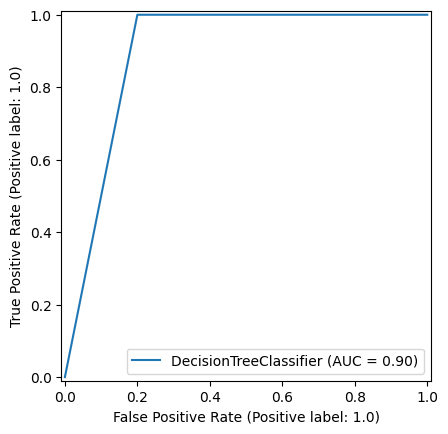

In [88]:
Accuracy= 100 * accuracy_score(Y_test, Y_pred)
print(Accuracy)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(clf , X_test_pca, Y_test)
plt.show()

GAUSSIAN NAIVE BAYE'S

97.8021978021978
              precision    recall  f1-score   support

         0.0       0.56      1.00      0.71         5
         1.0       1.00      0.98      0.99       177

    accuracy                           0.98       182
   macro avg       0.78      0.99      0.85       182
weighted avg       0.99      0.98      0.98       182



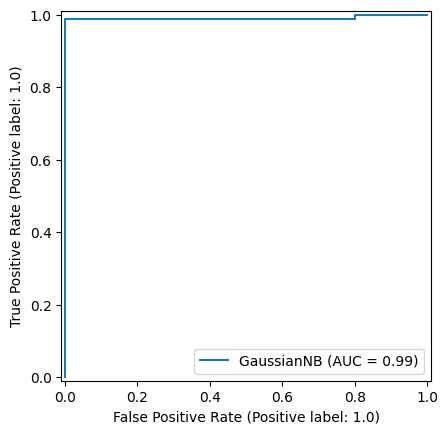

In [89]:
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train_pca, Y_train)

Y_pred = gnb.predict(X_test_pca)
accuracy = 100 * (accuracy_score(Y_test, Y_pred))
print(accuracy)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(gnb , X_test_pca, Y_test)
plt.show()

In [90]:
from sklearn.svm import LinearSVC


In [91]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train_pca, Y_train)


SVC(kernel='linear', random_state=0)

In [92]:
Y_pred= classifier.predict(X_test_pca)

100.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00       177

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



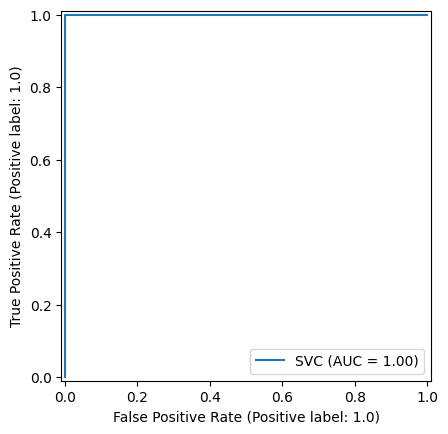

In [93]:
print(accuracy_score(Y_test, Y_pred)*100)

from sklearn import metrics
print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(classifier, X_test_pca, Y_test)
plt.show()

Ensemble Model Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00       177

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


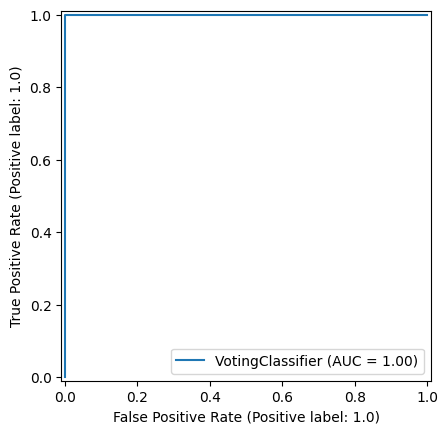

In [94]:
# prompt: make a ensemble model with 3 models include RF,SVM,LR

import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Create the individual models
rf_model = RandomForestClassifier(n_estimators=2)
svm_model = SVC(kernel='linear', probability=True)  # probability=True is needed for VotingClassifier
lr_model = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lr', lr_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)

# Make predictions
Y_pred = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, Y_pred)
print("Ensemble Model Accuracy:", accuracy)

print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()


In [96]:
import time
import sys

# Measure prediction latency
start_time = time.time()
Y_pred_ensemble_latency = ensemble_model.predict(X_test_pca)
end_time = time.time()
latency_ensemble = (end_time - start_time)  # Latency in seconds
print(f"Ensemble Model Prediction Latency: {latency_ensemble:.4f} seconds")

# Measure memory footprint
# This will give an estimate of the model's size in memory
memory_footprint_bytes_ensemble = sys.getsizeof(ensemble_model)
memory_footprint_kb_ensemble = memory_footprint_bytes_ensemble / 1024
print(f"Ensemble Model Memory Footprint: {memory_footprint_kb_ensemble:.2f} KB")

Ensemble Model Prediction Latency: 0.0056 seconds
Ensemble Model Memory Footprint: 0.05 KB


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Ensemble Model Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       175
         1.0       1.00      1.00      1.00       180

    accuracy                           1.00       355
   macro avg       1.00      1.00      1.00       355
weighted avg       1.00      1.00      1.00       355



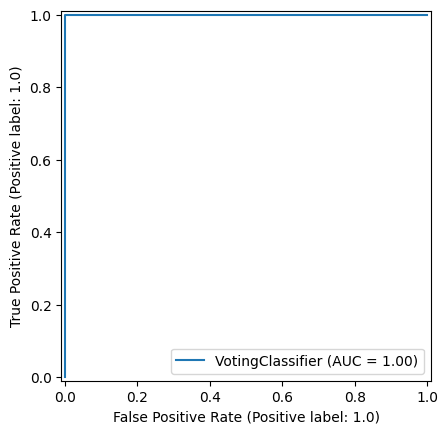

In [56]:
# prompt:  make a ensemble model with 4 models include RF,SVM,LR,XGBOOST

import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# ... (Your existing code) ...

# Create the individual models
rf_model = RandomForestClassifier(n_estimators=2)
svm_model = SVC(kernel='linear', probability=True)  # probability=True is needed for VotingClassifier
lr_model = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')
xgb_model = XGBClassifier(n_estimators=20)

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model), ('lr', lr_model), ('xgb', xgb_model)], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)

# Make predictions
Y_pred = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy = accuracy_score(Y_test, Y_pred)
print("Ensemble Model Accuracy:", accuracy)

print(metrics.classification_report(Y_test, Y_pred))

metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()


In [59]:
# prompt: make ensemble with top 4 model

import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Assuming you have trained the following models:
# clf_rf (RandomForestClassifier)
# clf_lr (LogisticRegression)
# clf_knn (KNeighborsClassifier)
# clf_xgb (XGBClassifier)


# Assuming you have your X_train_pca, Y_train, X_test_pca, and Y_test
# already defined and split.


# Create the individual models
clf_rf = RandomForestClassifier(n_estimators=2)
clf_lr = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_xgb = XGBClassifier(n_estimators=20)


# Fit each model
clf_rf.fit(X_train_pca, Y_train)
clf_lr.fit(X_train_pca, Y_train)
clf_knn.fit(X_train_pca, Y_train)
clf_xgb.fit(X_train_pca, Y_train)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', clf_rf),
    ('lr', clf_lr),
    ('knn', clf_knn),
    ('xgb', clf_xgb)],
    voting='hard')  # or 'soft' if your models have predict_proba


# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)


# Make predictions
Y_pred_ensemble = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(Y_test, Y_pred_ensemble)
print(f"Ensemble Accuracy: {accuracy_ensemble}")
print(metrics.classification_report(Y_test, Y_pred_ensemble))
metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Ensemble Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       175
         1.0       1.00      1.00      1.00       180

    accuracy                           1.00       355
   macro avg       1.00      1.00      1.00       355
weighted avg       1.00      1.00      1.00       355



AttributeError: VotingClassifier has none of the following attributes: predict_proba, decision_function.

In [58]:
# prompt: make ensemble with top 4 model

import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

# Assuming you have trained the following models:
# clf_rf (RandomForestClassifier)
# clf_lr (LogisticRegression)
# clf_knn (KNeighborsClassifier)
# clf_xgb (XGBClassifier)


# Assuming you have your X_train_pca, Y_train, X_test_pca, and Y_test
# already defined and split.


# Create the individual models
clf_rf = RandomForestClassifier(n_estimators=2)
clf_lr = LogisticRegression(random_state=0, solver='liblinear', max_iter=300, multi_class='ovr')
clf_knn = KNeighborsClassifier(n_neighbors=10)
clf_xgb = XGBClassifier(n_estimators=20)


# Fit each model
clf_rf.fit(X_train_pca, Y_train)
clf_lr.fit(X_train_pca, Y_train)
clf_knn.fit(X_train_pca, Y_train)
clf_xgb.fit(X_train_pca, Y_train)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', clf_rf),
    ('lr', clf_lr),
    ('knn', clf_knn),
    ('xgb', clf_xgb)],
    voting='hard')  # or 'soft' if your models have predict_proba


# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)


# Make predictions
Y_pred_ensemble = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(Y_test, Y_pred_ensemble)
print(f"Ensemble Accuracy: {accuracy_ensemble}")
print(metrics.classification_report(Y_test, Y_pred_ensemble))
metrics.RocCurveDisplay.from_estimator(ensemble_model, X_test_pca, Y_test)
plt.show()


Ensemble Accuracy: 0.9971830985915493
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       175
         1.0       1.00      0.99      1.00       180

    accuracy                           1.00       355
   macro avg       1.00      1.00      1.00       355
weighted avg       1.00      1.00      1.00       355



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


AttributeError: VotingClassifier has none of the following attributes: predict_proba, decision_function.

Ensemble Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       175
         1.0       1.00      1.00      1.00       180

    accuracy                           1.00       355
   macro avg       1.00      1.00      1.00       355
weighted avg       1.00      1.00      1.00       355



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


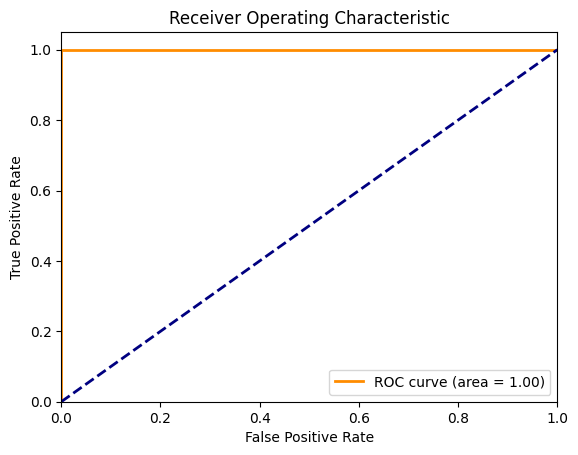

In [56]:
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# ... (Your existing code for model creation and training) ...

# Create the ensemble model with voting='soft'
ensemble_model = VotingClassifier(estimators=[
    ('rf', clf_rf),
    ('lr', clf_lr),
    ('knn', clf_knn),
    ('xgb', clf_xgb)],
    voting='soft')  # Change voting to 'soft'

# Train the ensemble model
ensemble_model.fit(X_train_pca, Y_train)

# Make predictions
Y_pred_ensemble = ensemble_model.predict(X_test_pca)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(Y_test, Y_pred_ensemble)
print(f"Ensemble Accuracy: {accuracy_ensemble}")

# Print classification report
print(classification_report(Y_test, Y_pred_ensemble))

# Plot ROC curve
Y_probs = ensemble_model.predict_proba(X_test_pca)[:, 1]  # Get probabilities for class 1
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()